## NOTE
### Tilføj et variance estimat og call it a day
Vi skal nok også lige tjekke antagelserne der ligger til en t-test før vi er helt done, men jeg kan ikke mere i dag

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [2]:
with open('model_out-ksg-label_tst.npy', 'rb') as f:
    lab_model = np.load(f).reshape(1000)
    lab_ksg = np.load(f)
    lab_truth = np.load(f).reshape(1000)

res_model = lab_truth - lab_model
res_ksg = lab_truth - lab_ksg

## T-test for unbiased
Vi laver en t-test for at se om vores model er unbiased, og kører samme test på KSG.
Vores null-hyp er at vores model er unbiased. Hvis vores p-værdi er under 1-a (konfidens, med a=0.05 typisk) så forkaster vi null-hyp.

In [3]:
p_model = float(stats.ttest_1samp(res_model, 0)[1])
p_ksg = float(stats.ttest_1samp(res_ksg, 0)[1])

print(f"Mean of RNN residuals: {np.mean(res_model):.4f}")
print(f"P-value for RNN unbiased: {p_model:.2f}")
print()
print(f"Mean of RNN residuals: {np.mean(res_ksg):.4f}")
print(f"P-value for RNN unbiased: {p_ksg:.2f}")

Mean of RNN residuals: 0.0007
P-value for RNN unbiased: 0.90

Mean of RNN residuals: 0.4523
P-value for RNN unbiased: 0.00


## Relation imellem størrelsen på resid, og størrelsen på MI

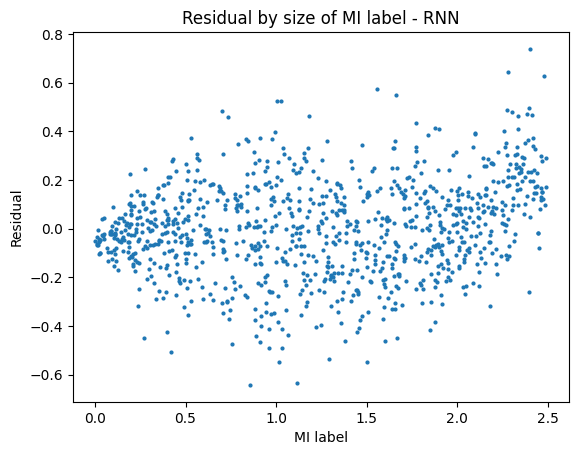

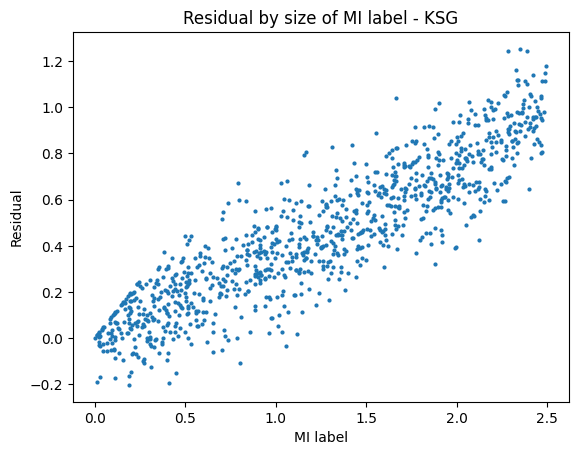

In [4]:
model_frame = pd.DataFrame(data=[res_model, lab_truth]).T
model_frame.columns = ["Residuals", "True label"]

model_frame.sort_values(by=["True label"])
plt.plot(
    model_frame["True label"].values,
    model_frame["Residuals"].values,
    ls="None",
    marker=".",
    markersize=4
)
plt.title("Residual by size of MI label - RNN")
plt.xlabel("MI label")
plt.ylabel("Residual")
plt.show()

ksg_frame = pd.DataFrame(data=[res_ksg, lab_truth]).T
ksg_frame.columns = ["Residuals", "True label"]

ksg_frame.sort_values(by=["True label"])
plt.plot(
    ksg_frame["True label"].values,
    ksg_frame["Residuals"].values,
    ls="None",
    marker=".",
    markersize=4
)
plt.title("Residual by size of MI label - KSG")
plt.xlabel("MI label")
plt.ylabel("Residual")
plt.show()

## MI interval model check

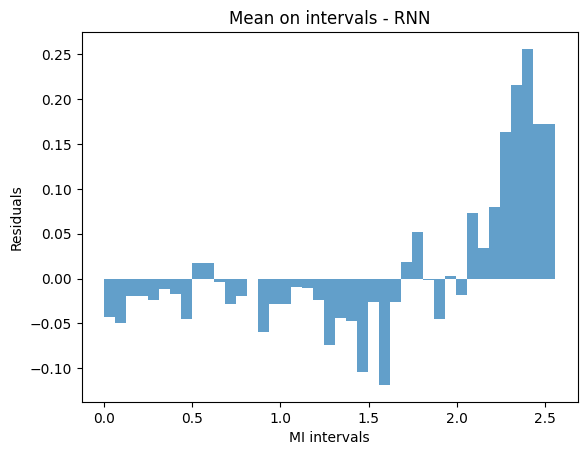

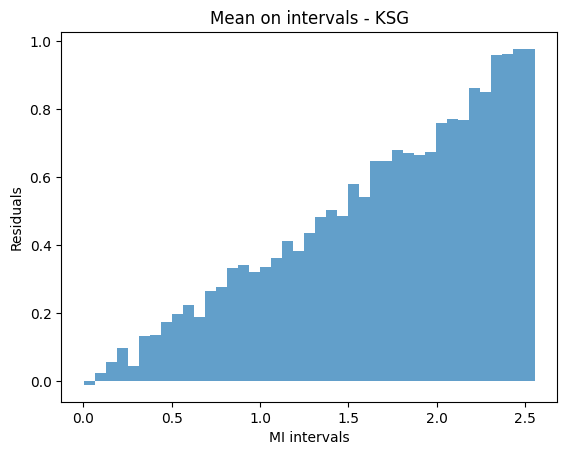

In [5]:
n_bins = 40 + 1
label_bins = np.linspace(np.min(lab_truth), np.max(lab_truth), n_bins)

split_idx = list()

for i in range(n_bins - 1):
    tmp = model_frame[
        (model_frame["True label"] >= label_bins[i]) & (model_frame["True label"] <= label_bins[i+1]) 
    ].index
    split_idx.append(tmp)

split_idx.append(
    model_frame[model_frame["True label"] >= label_bins[-2]].index
)

model_resid_mean_list = [model_frame["Residuals"].iloc[idx].mean() for idx in split_idx]
ksg_resid_mean_list = [ksg_frame["Residuals"].iloc[idx].mean() for idx in split_idx]

plt.bar(
    x=label_bins,
    height=model_resid_mean_list,
    align="edge",
    width=label_bins[1] - label_bins[0],
    alpha=0.7,
    label="RNN"
)
plt.title("Mean on intervals - RNN")
plt.xlabel("MI intervals")
plt.ylabel("Residuals")
plt.show()

plt.bar(
    x=label_bins,
    height=ksg_resid_mean_list,
    align="edge",
    width=label_bins[1] - label_bins[0],
    alpha=0.7,
    label="KSG"
)
plt.title("Mean on intervals - KSG")
plt.xlabel("MI intervals")
plt.ylabel("Residuals")
plt.show()

## Levene test

In [16]:
stats.levene(
    model_frame["Residuals"].values,
    ksg_frame["Residuals"].values,
    center="mean"
)

LeveneResult(statistic=254.9822186741761, pvalue=4.1011792601953906e-54)